# Data cleaning
## Note: Some description about why I addressed the specific columns this way is in EDA file.
其他發現:
(有點異動=>待修改)
這份資料組成應為被保險人以及要保人，由於受益人需填寫的資料只有"基本資料"，而沒有"生調表"及"健康告知書"，若有"純受益人"則對應欄位應該出現缺值，但這樣看來是沒有。另外，根據後續推測的"非要保人""非被保險人"的觀察，也證實不存在純受益人於資料。

# Import module and set basic items

In [5]:
'''import module'''

# basic tool
import os


# data process and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style and text
from matplotlib.font_manager import FontProperties

# fit model and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [6]:
# working dir
working_path = r"D:\mypython_d\Cathay_Big_data_competition_2019"
os.chdir(working_path)

In [7]:
# use big5 to encoding
train = pd.read_csv("train.csv", encoding="Big5", low_memory=False)
test = pd.read_csv("test.csv", encoding="Big5", low_memory=False)

In [9]:
# set figure style
sns.set_style("whitegrid")
# set text
font = FontProperties(fname=r"c:\windows\Fonts\msjh.ttc")
font_heavy = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc")
font_big = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc", size= "x-large")
font_kibig = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc", size= "large")

In [10]:
# show countplot, and rate of hue
def count_and_percent(col, data, hue, size=None):
    
    plt.figure(figsize=size)
    sns.countplot(x=col, data=data, palette="viridis")
    # change font
    plt.xticks(fontproperties=font_heavy)
    
    plt.figure(figsize=size)
    sns.countplot(x=col, data=data, hue=hue, palette="viridis")
    
    # change font
    plt.xticks(fontproperties=font_heavy)
    plt.legend(prop=font_heavy)
    
    plt.show()
    for cat in data[col].unique():
        show_percent(cat, col, data, hue)
    
def show_percent(category, col, data, hue):
    print("-------------------------------")
    print(str(category) + ":")
    if  repr(category) != "nan":
        value_info = data[data[col] == category][hue].value_counts()
        print(value_info)
        for hue_cat in sorted(value_info.keys()):
            print(str(hue_cat) + "(%):", (value_info[hue_cat]/value_info.sum()) * 100 )
    else:
        value_info = data[data[col].isnull()][hue].value_counts()
        print(value_info)
        for hue_cat in sorted(value_info.keys()):
            print(str(hue_cat) + "(%):", (value_info[hue_cat]/value_info.sum()) * 100 )

In [11]:
# 備份最原始的檔案
train_copy = train.copy()

# Set id as index

In [120]:
# 無重複直接這樣把他設成index
train.set_index("CUS_ID", inplace=True)

# Columns need to address(NaN)


In [121]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

73

# detect numbers of null in rows

In [122]:

def count_null(cols):
    
    null_count = sum(pd.isnull(cols))
    
    return null_count
        

In [123]:
train["numbers_of_null"] = train.apply(count_null, axis=1)

In [124]:
# 測試刪除資料後遺失值狀況改善程度
train_ts = train.copy()

In [125]:
# 考慮刪除遺失值超過n(約一半)的資料
len(train[train["numbers_of_null"] >= 55])

5783

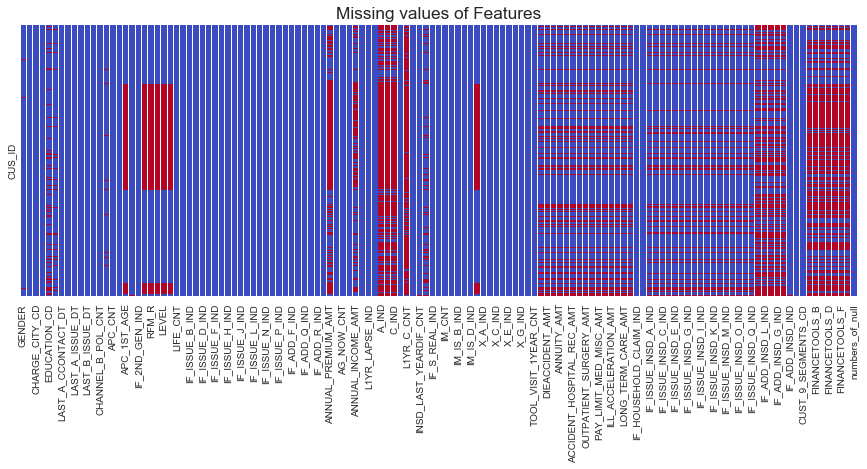

In [150]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

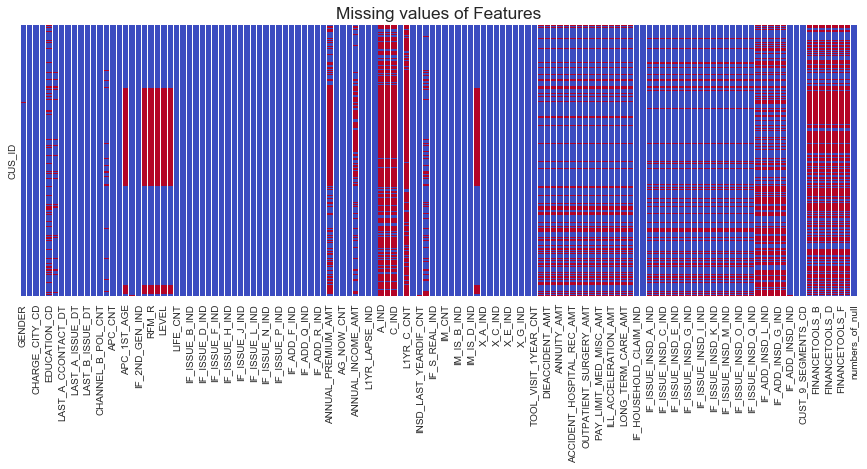

In [151]:
train_ts.drop(train_ts[train_ts["numbers_of_null"] >= 55].index, inplace=True)
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train_ts.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [152]:
train.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3418 to 1994377
Data columns (total 132 columns):
GENDER                       99317 non-null object
AGE                          100000 non-null object
CHARGE_CITY_CD               100000 non-null object
CONTACT_CITY_CD              100000 non-null object
EDUCATION_CD                 79438 non-null float64
MARRIAGE_CD                  92049 non-null float64
LAST_A_CCONTACT_DT           100000 non-null object
L1YR_A_ISSUE_CNT             100000 non-null int64
LAST_A_ISSUE_DT              100000 non-null object
L1YR_B_ISSUE_CNT             100000 non-null int64
LAST_B_ISSUE_DT              100000 non-null object
CHANNEL_A_POL_CNT            100000 non-null int64
CHANNEL_B_POL_CNT            100000 non-null int64
OCCUPATION_CLASS_CD          96040 non-null float64
APC_CNT                      100000 non-null int64
INSD_CNT                     100000 non-null int64
APC_1ST_AGE                  56718 non-null object
INSD_1ST

In [153]:
train_ts.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94217 entries, 3418 to 1994377
Data columns (total 132 columns):
GENDER                       93582 non-null object
AGE                          94217 non-null object
CHARGE_CITY_CD               94217 non-null object
CONTACT_CITY_CD              94217 non-null object
EDUCATION_CD                 76868 non-null float64
MARRIAGE_CD                  87763 non-null float64
LAST_A_CCONTACT_DT           94217 non-null object
L1YR_A_ISSUE_CNT             94217 non-null int64
LAST_A_ISSUE_DT              94217 non-null object
L1YR_B_ISSUE_CNT             94217 non-null int64
LAST_B_ISSUE_DT              94217 non-null object
CHANNEL_A_POL_CNT            94217 non-null int64
CHANNEL_B_POL_CNT            94217 non-null int64
OCCUPATION_CLASS_CD          90588 non-null float64
APC_CNT                      94217 non-null int64
INSD_CNT                     94217 non-null int64
APC_1ST_AGE                  56699 non-null object
INSD_1ST_AGE         

In [126]:
# 有遺失值欄位個數
len(train_ts.columns[pd.isnull(train_ts).sum() != 0])

73

### 沒有太大的差異先不刪資料

# 把含中文字欄位轉換成數字:
1. 低、中、中高、高 => 1 2 3 4
2. 低 中 高 => 1 2 3
3. N Y => 0 1(含label)
4. F M => 0 1
5. "A1": 1, "A2": 2, "B1":3 , "B2": 4, "C1": 5, "C2": 6,"D": 7, "E": 8
6. "A": 1, "B": 2, "C": 3, "D": 4, "E": 5,"F": 6, "G": 7, "H": 8

In [127]:
train['RFM_R']=train['RFM_R'].map({'中':2,'中高':3,'低':1,'高':4})
train['REBUY_TIMES_CNT']=train['REBUY_TIMES_CNT'].map({'中':2,'中高':3,'低':1,'高':4})
train['APC_1ST_AGE']=train['APC_1ST_AGE'].map({'中':2,'中高':3,'低':1,'高':4})
train['INSD_1ST_AGE']=train['INSD_1ST_AGE'].map({'中':2,'中高':3,'低':1,'高':4})
train['AGE']=train['AGE'].map({'中':2,'中高':3,'低':1,'高':4})
train['LIFE_CNT']=train['LIFE_CNT'].map({'中':2,'低':1,'高':3})

In [128]:

train["GENDER"] = train["GENDER"].map({"F": 0, "M": 1})
train["CHARGE_CITY_CD"] = train["CHARGE_CITY_CD"].map({"A1": 1, "A2": 2, "B1":3 , "B2": 4, "C1": 5, "C2": 6, 
                                                       "D": 7, "E": 8})
train["CONTACT_CITY_CD"] = train["CONTACT_CITY_CD"].map({"A1": 1, "A2": 2, "B1":3 , "B2": 4, "C1": 5, "C2": 6, 
                                                       "D": 7, "E": 8})

train["CUST_9_SEGMENTS_CD"] = train["CUST_9_SEGMENTS_CD"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, 
                                                               "F": 6, "G": 7, "H": 8})

In [129]:
for cols in train[["Y1", "IF_2ND_GEN_IND", "LAST_A_CCONTACT_DT", "LAST_A_ISSUE_DT", 
              "LAST_B_ISSUE_DT", "IF_ISSUE_A_IND", "IF_ISSUE_B_IND", "IF_ISSUE_C_IND", 
              "IF_ISSUE_D_IND", "IF_ISSUE_E_IND", "IF_ISSUE_F_IND", "IF_ISSUE_G_IND", 
              "IF_ISSUE_H_IND", "IF_ISSUE_I_IND", "IF_ISSUE_J_IND", "IF_ISSUE_K_IND", 
              "IF_ISSUE_L_IND", "IF_ISSUE_M_IND", "IF_ISSUE_N_IND", "IF_ISSUE_O_IND", 
              "IF_ISSUE_P_IND", "IF_ISSUE_Q_IND", "IF_ADD_F_IND", "IF_ADD_L_IND", 
              "IF_ADD_Q_IND", "IF_ADD_G_IND", "IF_ADD_R_IND", "IF_ISSUE_INSD_A_IND", 
              "IF_ISSUE_INSD_B_IND", "IF_ISSUE_INSD_C_IND", "IF_ISSUE_INSD_D_IND", 
              "IF_ISSUE_INSD_E_IND", "IF_ISSUE_INSD_F_IND", "IF_ISSUE_INSD_G_IND", 
              "IF_ISSUE_INSD_H_IND", "IF_ISSUE_INSD_I_IND", "IF_ISSUE_INSD_J_IND", "IF_ISSUE_INSD_K_IND", 
              "IF_ISSUE_INSD_L_IND", "IF_ISSUE_INSD_M_IND", "IF_ISSUE_INSD_N_IND", "IF_ISSUE_INSD_O_IND", 
              "IF_ISSUE_INSD_P_IND", "IF_ISSUE_INSD_Q_IND", "IF_ADD_INSD_F_IND", "IF_ADD_INSD_L_IND", 
              "IF_ADD_INSD_Q_IND", "IF_ADD_INSD_G_IND", "IF_ADD_INSD_R_IND","IF_ADD_IND", 
              "L1YR_PAYMENT_REMINDER_IND", "L1YR_LAPSE_IND", "LAST_B_CONTACT_DT", 
              "A_IND", "B_IND", "C_IND", "LAST_C_DT", "IF_S_REAL_IND", "IF_Y_REAL_IND", "IM_IS_A_IND", 
              "IM_IS_B_IND", "IM_IS_C_IND", "IM_IS_D_IND", "X_A_IND", "X_B_IND", "X_C_IND", "X_D_IND", 
              "X_E_IND", "X_F_IND", "X_G_IND", "X_H_IND", "IF_HOUSEHOLD_CLAIM_IND", "IF_ADD_INSD_IND", 
              "FINANCETOOLS_A", "FINANCETOOLS_B", "FINANCETOOLS_C", "FINANCETOOLS_D", "FINANCETOOLS_E", 
              "FINANCETOOLS_F", "FINANCETOOLS_G"]]:
    
    train[cols] = train[cols].map({"N": 0, "Y": 1})

# Imputation data

In [130]:
impute_dataset = train.dropna(axis=1).drop(["numbers_of_null", "Y1"], axis=1)

In [563]:
# impute_dataset.to_csv("impute_dataset.csv")
# pd.read_csv("impute_dataset.csv", index_col=0)

In [131]:
# 運用Extratrees觀察重要性
def importance_measure(col, seed=111, max_test=7, algorithm=ExtraTreesClassifier(random_state=111)):
    y = train[col].dropna(axis=0)
    X_train, X_test, y_train, y_test = train_test_split(impute_dataset.loc[y.index],
                                                        y, test_size=0.2, random_state=seed)
    impo_model = algorithm
    impo_model.fit(X_train, y_train)
    impo = list(zip(X_train.columns, impo_model.feature_importances_))
    impo.sort(reverse=True, key=lambda x: x[1])
    print("重要性排序:", np.array(impo)[:, 0])
    print("-----------------------------------")
    report(col, seed, np.array(impo)[:, 0], max_test, y, algorithm)
    
def report(col, seed, important_col, max_test, y, algorithm):
    
    for num_col in range(1, max_test + 1):
        print("測試欄位數:", num_col)
        X = impute_dataset[np.array(important_col[:num_col])]
        X_train, X_test, y_train, y_test = train_test_split(X.loc[y.index], y, test_size=0.2, random_state=seed)
        imp_model = algorithm
        imp_model.fit(X_train, y_train)
        pred = imp_model.predict(X_test)
        try:
            print(classification_report(y_test, pred))
            print(accuracy_score(y_test, pred))
        except ValueError:
            MSE = mean_squared_error(y_test, pred)
            print("MSE:", MSE)
            print("RMSE:", np.sqrt(MSE))
        print("-----------------------------------")
        
def impute(important_cols, impute_col, algorithm=ExtraTreesClassifier(random_state=111)):
    null_data = train[pd.isnull(train[impute_col])]
    value_data = train[impute_col].dropna(axis=0)
    
    imp = algorithm
    imp.fit(train[important_cols].loc[value_data.index], value_data)
    null_data[impute_col] = imp.predict(train[important_cols].loc[null_data.index])
    train["tempor"] = null_data[impute_col]
    train[impute_col] = train[[impute_col, "tempor"]].apply(impute_function, axis=1)
    train.drop("tempor", axis=1, inplace=True)
    
    return imp

def impute_function(cols):
    
    target = cols[0]
    predictor = cols[1]
    
    if pd.isnull(predictor):
        return target
    
    else:
        return predictor

In [132]:

def important_test(col, test_time=10, algorithm=ExtraTreesClassifier(random_state=111)):
    
    test_list = []
    seed_list = [random.randint(0, 10000) for i in range(test_time)]
    
    for seed in seed_list:
        y = train[col].dropna(axis=0)
        X_train, X_test, y_train, y_test = train_test_split(impute_dataset.loc[y.index],
                                                            y, test_size=0.2, random_state=seed)
        impo_model = algorithm
        impo_model.fit(X_train, y_train)
        impo = list(zip(X_train.columns, impo_model.feature_importances_))
        impo.sort(reverse=True, key=lambda x: x[1])
        
        for important_ele in np.array(impo)[:10, 0]:
            test_list.append(important_ele)
    
    result = [(ele, test_list.count(ele)) for ele in set(test_list)]
    result.sort(reverse=True, key=lambda x: x[1])
    
    return result, seed_list

# Gender
共683遺失值

使用OCCUPATION_CLASS_CD去填補GENDER欄位遺失值。規則為:如果職業類別是1則為Female；其他(含NaN)則為Male。

In [133]:
# use OCCUPATION_CLASS_CD to fill gender
def gender_clean(cols):
    
    gender = cols[0]
    occ = cols[1]
    
    
    # if gender is null
    if pd.isnull(gender):
        
        # if occupation is 1
        if occ == 1:
            return 0
            
        else:
            return 1
        
    else:
        return gender

In [134]:
train["GENDER"] = train[["GENDER", "OCCUPATION_CLASS_CD"]].apply(gender_clean, axis=1)

In [135]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

72

# observe column more than 50000 null

In [136]:
train.columns[pd.isnull(train).sum() >= 50000]

Index(['ANNUAL_PREMIUM_AMT', 'A_IND', 'B_IND', 'C_IND', 'L1YR_C_CNT',
       'IF_ADD_INSD_F_IND', 'IF_ADD_INSD_L_IND', 'IF_ADD_INSD_Q_IND',
       'IF_ADD_INSD_G_IND', 'IF_ADD_INSD_R_IND', 'FINANCETOOLS_A',
       'FINANCETOOLS_B', 'FINANCETOOLS_C', 'FINANCETOOLS_D', 'FINANCETOOLS_E',
       'FINANCETOOLS_F', 'FINANCETOOLS_G'],
      dtype='object')

In [23]:
for cols in train.columns[pd.isnull(train).sum() >= 50000]:
    
    print(cols)
    print("----------------------")
    print("遺失值的NY:")
    print(train[pd.isnull(train[cols])]["Y1"].value_counts())
    print("***************")

    print("非遺失值的NY:")
    print(train[[cols, "Y1"]].dropna()["Y1"].value_counts())
    print("----------------------")


ANNUAL_PREMIUM_AMT
----------------------
遺失值的NY:
0    61841
1      604
Name: Y1, dtype: int64
***************
非遺失值的NY:
0    36159
1     1396
Name: Y1, dtype: int64
----------------------
A_IND
----------------------
遺失值的NY:
0    78728
1     1143
Name: Y1, dtype: int64
***************
非遺失值的NY:
0    19272
1      857
Name: Y1, dtype: int64
----------------------
B_IND
----------------------
遺失值的NY:
0    78728
1     1143
Name: Y1, dtype: int64
***************
非遺失值的NY:
0    19272
1      857
Name: Y1, dtype: int64
----------------------
C_IND
----------------------
遺失值的NY:
0    78728
1     1143
Name: Y1, dtype: int64
***************
非遺失值的NY:
0    19272
1      857
Name: Y1, dtype: int64
----------------------
L1YR_C_CNT
----------------------
遺失值的NY:
0    86500
1     1436
Name: Y1, dtype: int64
***************
非遺失值的NY:
0    11500
1      564
Name: Y1, dtype: int64
----------------------
IF_ADD_INSD_F_IND
----------------------
遺失值的NY:
0    51079
1      769
Name: Y1, dtype: int64
*************

In [167]:
# 暫存非遺失值(少數)；超過1200的欄位於temporary_col。另外，後來證實這些欄位可能可以由"非要保人"這項資訊來確認遺失值(後續拉回欄處理)
temporary_col = train[["ANNUAL_PREMIUM_AMT", "IF_ADD_INSD_F_IND", "IF_ADD_INSD_L_IND", 
                       "IF_ADD_INSD_Q_IND", "IF_ADD_INSD_G_IND", "IF_ADD_INSD_R_IND"]]
# write out
temporary_col.to_csv("temporary_col.csv", index=True)

# pd.read_csv("temporary_col.csv", index_col=0)

### L1YR_C_CNT有部分值是可由LAST_C_DT確認的
近一年到 C 通路申辦服務次數；近三年是否有到 C 通路申辦服務 

後者為0(沒有)時前者必為0

In [137]:
# use LAST_C_DT to fill some  L1YR_C_CNT
def clean_l1yr_c_cnt(cols):
    
    LAST_C_DT = cols[0]
    L1YR_C_CNT = cols[1]
    
    if pd.isnull(L1YR_C_CNT):
        if LAST_C_DT == 0:
            return 0
        
    
    return L1YR_C_CNT

train["L1YR_C_CNT"] = train[["LAST_C_DT", "L1YR_C_CNT"]].apply(clean_l1yr_c_cnt, axis=1)

In [138]:
# 刪除該16個超過50000遺失值欄位(有一欄L1YR_C_CNT以無這麼多遺失值)
train.drop(train.columns[pd.isnull(train).sum() >= 50000], axis=1, inplace=True)

In [139]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

56

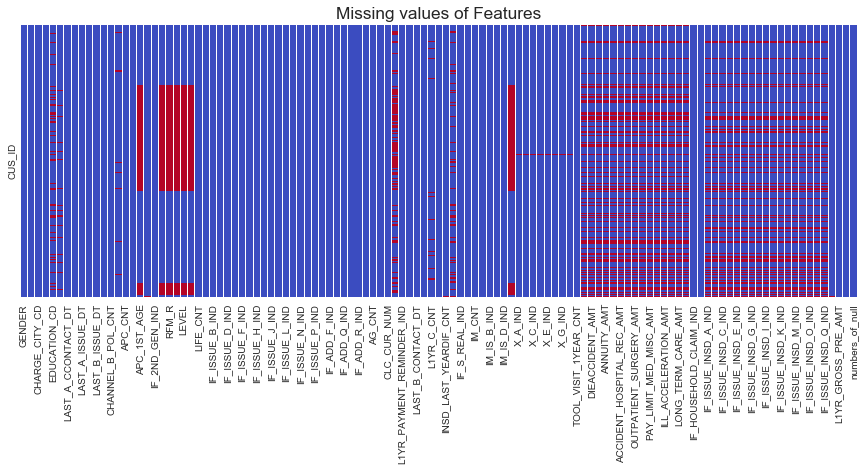

In [430]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

# MARRIAGE_CD(婚姻狀況)=>from 生調表(要保人、被保人)
共7951個遺失值


In [97]:
sum(train["MARRIAGE_CD"].isnull())

7951

In [98]:
sum(train["EDUCATION_CD"].isnull())

20562

In [99]:
sum(train["ANNUAL_INCOME_AMT"].isnull())

39201

## 和EDUCATION_CD、ANNUAL_INCOME_AMT(同為生調表)共同觀察=>純受益人情況
* 最終假設不成立=>仍認為整個資料不含純受益人會較合理(就算有也是極少數)
* 可能有14個純受益人(從這裏的資訊來看)

In [140]:
# 三欄位皆為NAN的資料
mar_edu_na = train[(train["MARRIAGE_CD"].isnull()) & (train["EDUCATION_CD"].isnull()) & (train["ANNUAL_INCOME_AMT"].isnull())]

In [141]:
len(mar_edu_na)

7114

In [142]:
# 首次擔任要保人年齡(級距)有數字
# 假設不成立=>非純受益人
print(mar_edu_na["APC_1ST_AGE"].value_counts(dropna=0))
print(sum(mar_edu_na["APC_1ST_AGE"].value_counts()))

NaN     3620
 3.0    1388
 1.0     791
 4.0     774
 2.0     541
Name: APC_1ST_AGE, dtype: int64
3494


In [143]:
# 首次擔任被保人年齡(級距)有數字
# 假設不成立=>非純受益人;剩餘14人為極少數，就算是也可不理會
print(mar_edu_na["INSD_1ST_AGE"].value_counts(dropna=0))
print(sum(mar_edu_na["INSD_1ST_AGE"].value_counts()))

 1.0    1961
 3.0    1939
 4.0    1660
 2.0    1540
NaN       14
Name: INSD_1ST_AGE, dtype: int64
7100


## 處理
觀察NAN狀態後認為使用眾數補值是合理的

In [144]:
train["MARRIAGE_CD"] = train["MARRIAGE_CD"].fillna(0)

In [145]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

55

In [146]:
# 剩餘欄位數
len(train.columns)

116

# EDUCATION_CD
* 共20562遺失值
* 和AGE欄位、是否為保戶二代有一定關係(此二欄位本來都無遺失值)=>從圖表觀察
* 由extratree判斷之重要性排序(取前7):
    1. CUST_9_SEGMENTS_CD             九大客群
    2. AGE                              年齡
    3. LIFE_INSD_CNT            目前主約被保有效件數(件)   
    4. CONTACT_CITY_CD              聯絡地址_縣市 
    5. TOOL_VISIT_1YEAR_CNT   近一年業務員管理工具拜訪次數 
    6. LIFE_CNT               目前主約持有有效件數(件)(級距) 
    7. L1YR_GROSS_PRE_AMT     近一年實繳保費 (神秘轉換&歸一化) 
    8. IF_2ND_GEN_IND               是否為保戶二代

=>表現皆不佳(acc: 0.65)，先將NAN視為一類別

In [147]:
# 多元分類問題(沒有太嚴重的不平衡，雖然4為少數類別)
train["EDUCATION_CD"].value_counts()

3.0    30586
1.0    24873
2.0    20120
4.0     3859
Name: EDUCATION_CD, dtype: int64

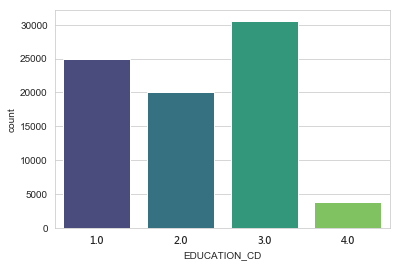

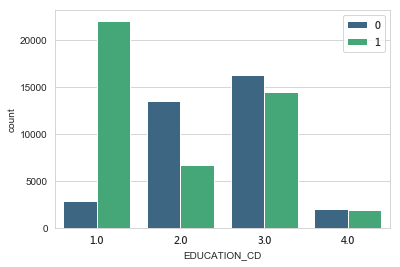

-------------------------------
nan:
0    11214
1     9348
Name: IF_2ND_GEN_IND, dtype: int64
0(%): 54.5374963524949
1(%): 45.46250364750511
-------------------------------
1.0:
1    22017
0     2856
Name: IF_2ND_GEN_IND, dtype: int64
0(%): 11.482330237607044
1(%): 88.51766976239296
-------------------------------
2.0:
0    13447
1     6673
Name: IF_2ND_GEN_IND, dtype: int64
0(%): 66.83399602385686
1(%): 33.166003976143145
-------------------------------
3.0:
0    16201
1    14385
Name: IF_2ND_GEN_IND, dtype: int64
0(%): 52.96867848035048
1(%): 47.03132151964951
-------------------------------
4.0:
0    1967
1    1892
Name: IF_2ND_GEN_IND, dtype: int64
0(%): 50.97175434050272
1(%): 49.02824565949728


In [148]:
count_and_percent("EDUCATION_CD", train, "IF_2ND_GEN_IND")

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


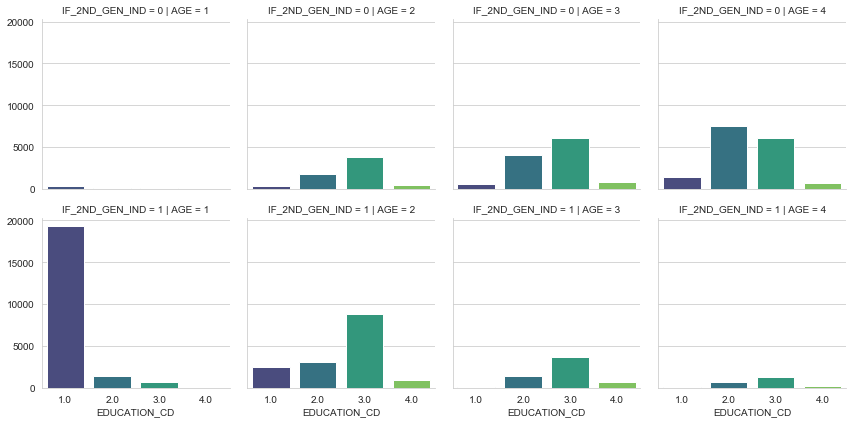

In [179]:
g1 = sns.FacetGrid(train, row="IF_2ND_GEN_IND", col="AGE")
g1 = g1.map(sns.countplot, "EDUCATION_CD", palette="viridis")

In [149]:
# 運用Extratrees觀察重要性
y = train["EDUCATION_CD"].dropna(axis=0)
X_train, X_test, y_train, y_test = train_test_split(impute_dataset.loc[train["EDUCATION_CD"].dropna(axis=0).index],
                                                    y, test_size=0.2, random_state=111)

In [33]:
impo_edu_model = ExtraTreesClassifier(random_state=111)
impo_edu_model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=111, verbose=0, warm_start=False)

In [34]:
edu_impo = list(zip(X_train.columns, impo_edu_model.feature_importances_))
edu_impo.sort(reverse=True, key=lambda x: x[1])

In [35]:
print("重要性排序:", edu_impo)

重要性排序: [('AGE', 0.13967485388151718), ('CUST_9_SEGMENTS_CD', 0.07465243897078769), ('CONTACT_CITY_CD', 0.05446055766929843), ('LIFE_INSD_CNT', 0.054276061302338904), ('TOOL_VISIT_1YEAR_CNT', 0.051102041217631976), ('LAST_A_CCONTACT_DT', 0.04172028965455317), ('IF_2ND_GEN_IND', 0.03457569305941117), ('CHANNEL_A_POL_CNT', 0.03401099707368865), ('CHARGE_CITY_CD', 0.032061482095577055), ('AG_NOW_CNT', 0.031456986539304704), ('L1YR_GROSS_PRE_AMT', 0.030385610808957308), ('IM_CNT', 0.02728735184118451), ('BANK_NUMBER_CNT', 0.025178699340703443), ('AG_CNT', 0.02304379742499063), ('APC_CNT', 0.0228929564028843), ('IF_HOUSEHOLD_CLAIM_IND', 0.021122771339379752), ('LAST_C_DT', 0.020630238197066452), ('CLC_CUR_NUM', 0.0181262867709825), ('INSD_CNT', 0.01575460914660746), ('IM_IS_D_IND', 0.015044778028640796), ('LAST_B_CONTACT_DT', 0.014923372795762738), ('IF_S_REAL_IND', 0.014621531315116672), ('IF_ADD_IND', 0.012903516199205762), ('LIFE_CNT', 0.012882024250316159), ('IF_Y_REAL_IND', 0.0127592773

In [36]:
# 分別用1個欄位、2個欄位...去側acc:0.61 0.64 0.64 0.64 0.62
X_edu = train[np.array(edu_impo[:6])[:, 0]]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_edu.loc[train["EDUCATION_CD"].dropna(axis=0).index],
                                                    y, test_size=0.2, random_state=111)

In [38]:
imp_model_edu = ExtraTreesClassifier(random_state=111)
imp_model_edu.fit(X_train, y_train)
pred = imp_model_edu.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

         1.0       0.85      0.81      0.83      4959
         2.0       0.44      0.37      0.40      4092
         3.0       0.57      0.70      0.63      6084
         4.0       0.11      0.02      0.04       753

   micro avg       0.62      0.62      0.62     15888
   macro avg       0.49      0.48      0.47     15888
weighted avg       0.60      0.62      0.60     15888

0.6179506545820745


### 模型方式接無法很好預測=>暫時先使用眾數法填補

In [150]:
train["EDUCATION_CD"] = train["EDUCATION_CD"].fillna(0, axis=0)

In [151]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

54

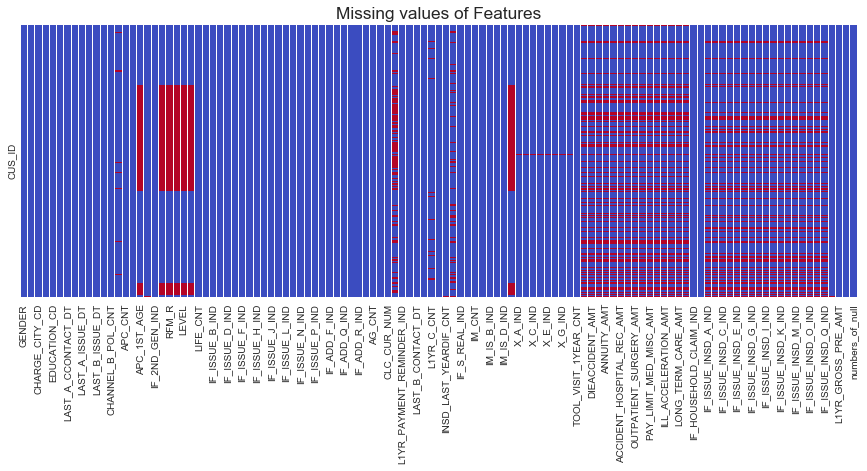

In [463]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [464]:
train.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3418 to 1994377
Data columns (total 116 columns):
GENDER                       100000 non-null float64
AGE                          100000 non-null int64
CHARGE_CITY_CD               100000 non-null int64
CONTACT_CITY_CD              100000 non-null int64
EDUCATION_CD                 100000 non-null float64
MARRIAGE_CD                  100000 non-null float64
LAST_A_CCONTACT_DT           100000 non-null int64
L1YR_A_ISSUE_CNT             100000 non-null int64
LAST_A_ISSUE_DT              100000 non-null int64
L1YR_B_ISSUE_CNT             100000 non-null int64
LAST_B_ISSUE_DT              100000 non-null int64
CHANNEL_A_POL_CNT            100000 non-null int64
CHANNEL_B_POL_CNT            100000 non-null int64
OCCUPATION_CLASS_CD          96040 non-null float64
APC_CNT                      100000 non-null int64
INSD_CNT                     100000 non-null int64
APC_1ST_AGE                  56718 non-null float64
INSD_1ST_

# OCCUPATION_CLASS_CD
共3960遺失值

* 看看有沒有和某個是否被保有關
ex. IF_S_REAL_IND是否投保S險/IF_Y_REAL_INDY險

* 用Extratrees觀察重要性並補值(取前10)
    1. CONTACT_CITY_CD
    2. TOOL_VISIT_1YEAR_CNT
    3. LIFE_INSD_CNT
    4. CUST_9_SEGMENTS_CD
    5. AGE
    6. L1YR_GROSS_PRE_AMT
    7. CHARGE_CITY_CD
    8. CHANNEL_A_POL_CNT
    9. AG_CNT
    10. AG_NOW_CNT

In [41]:
# 運用Extratrees觀察重要性
importance_measure("OCCUPATION_CLASS_CD", max_test=15)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


重要性排序: ['CONTACT_CITY_CD' 'LIFE_INSD_CNT' 'TOOL_VISIT_1YEAR_CNT'
 'CUST_9_SEGMENTS_CD' 'AGE' 'L1YR_GROSS_PRE_AMT' 'CHARGE_CITY_CD'
 'CHANNEL_A_POL_CNT' 'AG_CNT' 'AG_NOW_CNT' 'BANK_NUMBER_CNT'
 'IF_2ND_GEN_IND' 'APC_CNT' 'INSD_CNT' 'IF_HOUSEHOLD_CLAIM_IND'
 'LAST_A_CCONTACT_DT' 'LAST_C_DT' 'CLC_CUR_NUM' 'IM_CNT'
 'LAST_B_CONTACT_DT' 'IF_Y_REAL_IND' 'IF_S_REAL_IND' 'L1YR_LAPSE_IND'
 'IM_IS_D_IND' 'LIFE_CNT' 'IM_IS_B_IND' 'IF_ADD_IND' 'IF_ISSUE_P_IND'
 'IF_ISSUE_J_IND' 'IF_ISSUE_N_IND' 'IF_ADD_R_IND' 'IF_ISSUE_D_IND'
 'L1YR_A_ISSUE_CNT' 'IM_IS_C_IND' 'LAST_A_ISSUE_DT' 'IF_ADD_F_IND'
 'IF_ISSUE_Q_IND' 'L1YR_PAYMENT_REMINDER_IND' 'IF_ADD_Q_IND'
 'IF_ISSUE_I_IND' 'IF_ADD_L_IND' 'IF_ISSUE_C_IND' 'IF_ISSUE_G_IND'
 'CHANNEL_B_POL_CNT' 'IF_ISSUE_F_IND' 'IF_ISSUE_A_IND' 'IF_ISSUE_L_IND'
 'IF_ISSUE_B_IND' 'IF_ADD_G_IND' 'IF_ISSUE_O_IND' 'IM_IS_A_IND'
 'LAST_B_ISSUE_DT' 'IF_ISSUE_K_IND' 'L1YR_B_ISSUE_CNT' 'IF_ISSUE_E_IND'
 'IF_ISSUE_M_IND' 'IF_ISSUE_H_IND']
-----------------------------------
測試欄位數

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.78      1.00      0.88     14943
         2.0       0.00      0.00      0.00      2891
         3.0       0.00      0.00      0.00       723
         4.0       0.00      0.00      0.00       399
         5.0       0.00      0.00      0.00        41
         6.0       0.00      0.00      0.00        37

   micro avg       0.78      0.78      0.78     19208
   macro avg       0.11      0.14      0.13     19208
weighted avg       0.61      0.78      0.68     19208

0.7779571012078301
-----------------------------------
測試欄位數: 2


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.78      1.00      0.88     14943
         2.0       0.33      0.00      0.00      2891
         3.0       1.00      0.00      0.00       723
         4.0       0.00      0.00      0.00       399
         5.0       0.00      0.00      0.00        41
         6.0       0.00      0.00      0.00        37

   micro avg       0.78      0.78      0.78     19208
   macro avg       0.30      0.14      0.13     19208
weighted avg       0.69      0.78      0.68     19208

0.7779571012078301
-----------------------------------
測試欄位數: 3


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.78      0.99      0.87     14943
         2.0       0.26      0.01      0.02      2891
         3.0       0.11      0.00      0.01       723
         4.0       0.00      0.00      0.00       399
         5.0       0.00      0.00      0.00        41
         6.0       0.00      0.00      0.00        37

   micro avg       0.77      0.77      0.77     19208
   macro avg       0.16      0.14      0.13     19208
weighted avg       0.65      0.77      0.68     19208

0.7743127863390254
-----------------------------------
測試欄位數: 4
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.78      0.98      0.87     14943
         2.0       0.26      0.04      0.07      2891
         3.0       0.00      0.00      0.00       723
         4.0       0.08      0.01      0.01       399
         5.0  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.78      0.97      0.87     14943
         2.0       0.28      0.05      0.09      2891
         3.0       0.03      0.00      0.01       723
         4.0       0.03      0.00      0.00       399
         5.0       0.00      0.00      0.00        41
         6.0       0.00      0.00      0.00        37

   micro avg       0.76      0.76      0.76     19208
   macro avg       0.16      0.15      0.14     19208
weighted avg       0.65      0.76      0.69     19208

0.7640045814244065
-----------------------------------
測試欄位數: 6
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       174
         1.0       0.79      0.92      0.85     14943
         2.0       0.26      0.13      0.17      2891
         3.0       0.07      0.03      0.04       723
         4.0       0.02      0.01      0.01       399
         5.0  

In [152]:
# 用前10欄
important_cols =['CONTACT_CITY_CD', 'TOOL_VISIT_1YEAR_CNT', 'LIFE_INSD_CNT',
     'CUST_9_SEGMENTS_CD', 'AGE', 'L1YR_GROSS_PRE_AMT', 'CHARGE_CITY_CD',
     'CHANNEL_A_POL_CNT', 'AG_CNT', 'AG_NOW_CNT']
occ_model = impute(important_cols, "OCCUPATION_CLASS_CD")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


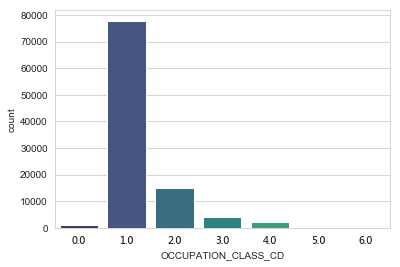

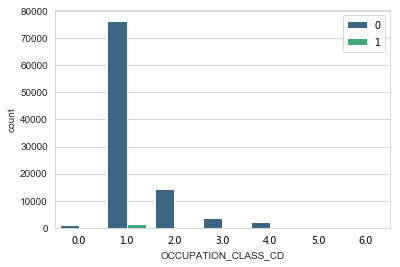

-------------------------------
1.0:
0    76416
1     1424
Name: Y1, dtype: int64
0(%): 98.17060637204523
1(%): 1.8293936279547791
-------------------------------
2.0:
0    14487
1      418
Name: Y1, dtype: int64
0(%): 97.19557195571956
1(%): 2.8044280442804426
-------------------------------
3.0:
0    3788
1     100
Name: Y1, dtype: int64
0(%): 97.42798353909465
1(%): 2.57201646090535
-------------------------------
5.0:
0    222
1      6
Name: Y1, dtype: int64
0(%): 97.36842105263158
1(%): 2.631578947368421
-------------------------------
4.0:
0    2018
1      40
Name: Y1, dtype: int64
0(%): 98.05636540330418
1(%): 1.9436345966958213
-------------------------------
6.0:
0    196
1      7
Name: Y1, dtype: int64
0(%): 96.55172413793103
1(%): 3.4482758620689653
-------------------------------
0.0:
0    873
1      5
Name: Y1, dtype: int64
0(%): 99.43052391799544
1(%): 0.5694760820045558


In [467]:
count_and_percent("OCCUPATION_CLASS_CD", train, "Y1")

In [153]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

53

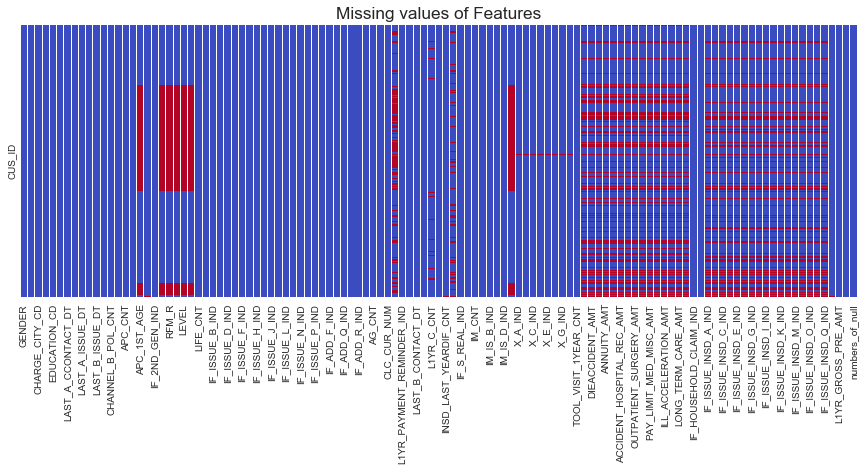

In [469]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

# INSD_1ST_AGE首次擔任被保人年齡(級距) 

# IF_ADD_INSD_IND(是否投保附約(被保) )

# INSD_LAST_YEARDIF_CNT(最近一次被保人身份投保距今間隔時間(年) (神秘轉換&歸一化) )

171遺失值

根據EDA、cleaning2發現此類人其實就是:只是要保人，而沒有擔任被保險人的人(None)

=>由於數量極少，最後階段時將此171筆資料刪除

In [154]:
train["INSD_1ST_AGE"].value_counts()

2.0    25698
1.0    25170
4.0    24974
3.0    23987
Name: INSD_1ST_AGE, dtype: int64

# APC_1ST_AGE, APC_1ST_YEARDIF, REBUY_TIMES_CNT, RFM_M_LEVEL, TERMINATION_RATE
***後續RFM_R欄位也加入此系列***

* 43282筆遺失值
* 根據eda認為這些人表示非要保人之，被保險人或受益人=>故若為類別資料將NAN當成1個類別(APC_1ST_AGE,REBUY_TIMES_CNT, RFM_M_LEVEL)

=> APC_1ST_AGE首次擔任要保人年齡(級距) 設為0 (會變成名目尺度)

=> REBUY_TIMES_CNT再購次數(級距) 設為0

=> RFM_M_LEVEL曾投保主約件數(等級) 設為0


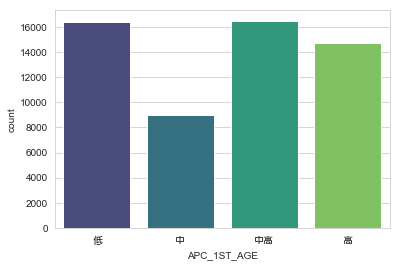

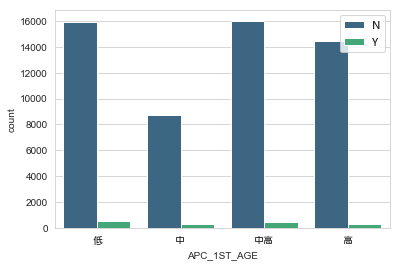

-------------------------------
低:
N    15898
Y      545
Name: Y1, dtype: int64
N(%): 96.68551967402543
Y(%): 3.314480325974579
-------------------------------
中:
N    8705
Y     305
Name: Y1, dtype: int64
N(%): 96.61487236403997
Y(%): 3.3851276359600444
-------------------------------
中高:
N    16028
Y      479
Name: Y1, dtype: int64
N(%): 97.09820076331253
Y(%): 2.9017992366874656
-------------------------------
高:
N    14474
Y      284
Name: Y1, dtype: int64
N(%): 98.0756200027104
Y(%): 1.9243799972896058
-------------------------------
nan:
N    42895
Y      387
Name: Y1, dtype: int64
N(%): 99.10586386950695
Y(%): 0.8941361304930456


In [14]:
count_and_percent("APC_1ST_AGE", train, "Y1")

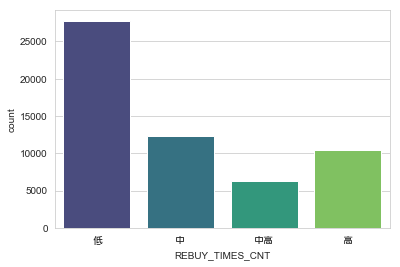

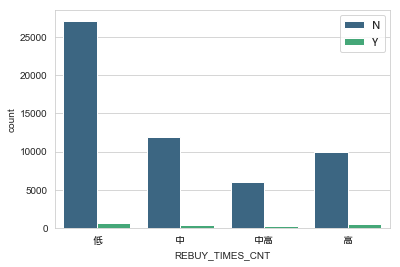

-------------------------------
低:
N    27154
Y      624
Name: Y1, dtype: int64
N(%): 97.75361797105623
Y(%): 2.2463820289437684
-------------------------------
中:
N    11919
Y      348
Name: Y1, dtype: int64
N(%): 97.16312056737588
Y(%): 2.8368794326241136
-------------------------------
中高:
N    6062
Y     193
Name: Y1, dtype: int64
N(%): 96.9144684252598
Y(%): 3.085531574740208
-------------------------------
高:
N    9970
Y     448
Name: Y1, dtype: int64
N(%): 95.69975043194471
Y(%): 4.300249568055289
-------------------------------
nan:
N    42895
Y      387
Name: Y1, dtype: int64
N(%): 99.10586386950695
Y(%): 0.8941361304930456


In [12]:
count_and_percent("REBUY_TIMES_CNT", train, "Y1")

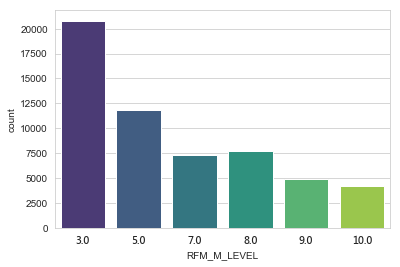

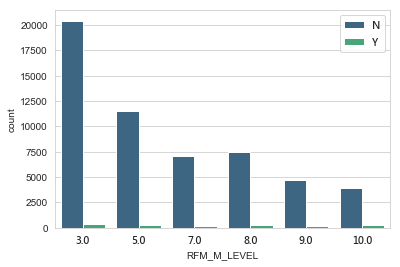

-------------------------------
3.0:
N    20427
Y      372
Name: Y1, dtype: int64
N(%): 98.21145247367662
Y(%): 1.7885475263233808
-------------------------------
5.0:
N    11542
Y      290
Name: Y1, dtype: int64
N(%): 97.54901960784314
Y(%): 2.450980392156863
-------------------------------
7.0:
N    7076
Y     220
Name: Y1, dtype: int64
N(%): 96.98464912280701
Y(%): 3.0153508771929824
-------------------------------
8.0:
N    7454
Y     299
Name: Y1, dtype: int64
N(%): 96.143428350316
Y(%): 3.856571649683993
-------------------------------
9.0:
N    4683
Y     182
Name: Y1, dtype: int64
N(%): 96.2589928057554
Y(%): 3.741007194244604
-------------------------------
10.0:
N    3923
Y     250
Name: Y1, dtype: int64
N(%): 94.00910615863887
Y(%): 5.990893841361132
-------------------------------
nan:
N    42895
Y      387
Name: Y1, dtype: int64
N(%): 99.10586386950695
Y(%): 0.8941361304930456


In [13]:
count_and_percent("RFM_M_LEVEL", train, "Y1")

In [155]:
# 類別資料
train["APC_1ST_AGE"] = train["APC_1ST_AGE"].fillna(0)
train["REBUY_TIMES_CNT"] = train["REBUY_TIMES_CNT"].fillna(0)
train["RFM_M_LEVEL"] = train["RFM_M_LEVEL"].fillna(0)

In [156]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

50

###  APC_1ST_YEARDIF

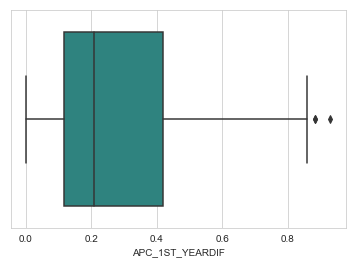

In [48]:
# APC_1ST_YEARDIF
sns.boxplot("APC_1ST_YEARDIF", data=train, palette="viridis")

In [157]:
des1_apc_1st = train["APC_1ST_YEARDIF"].describe()
print(des1_apc_1st)

count    56718.000000
mean         0.258769
std          0.182968
min          0.000000
25%          0.116279
50%          0.209302
75%          0.418605
max          0.930233
Name: APC_1ST_YEARDIF, dtype: float64


### 離散化處理(把NAN當成一類)(名目尺度)
0 =>nan

1 => [0,25]

2 => (25,50]

3 => (50,75]

4 => (75,100]

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


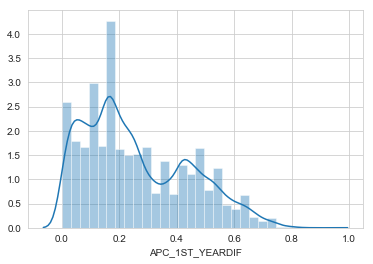

In [158]:
# 離散化處理(把NAN當成一類)(名目尺度)
sns.distplot(train["APC_1ST_YEARDIF"].dropna(), bins=30)

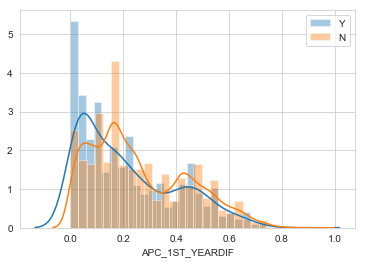

In [159]:
sns.distplot(train.loc[train["APC_1ST_YEARDIF"].dropna().index][train.loc[train["APC_1ST_YEARDIF"].dropna().index]["Y1"] == 1]["APC_1ST_YEARDIF"], 
             bins=30, label="Y")

sns.distplot(train.loc[train["APC_1ST_YEARDIF"].dropna().index][train.loc[train["APC_1ST_YEARDIF"].dropna().index]["Y1"] == 0]["APC_1ST_YEARDIF"], 
             bins=30, label="N")
plt.legend()

In [160]:

def apc_1st_impute(col):

    if pd.isnull(col):
        return 0
    
    elif col <= des1_apc_1st["25%"]:
        return 1
    
    elif col > des1_apc_1st["25%"] and col <= des1_apc_1st["50%"]:
        return 2
    
    elif col > des1_apc_1st["50%"] and col <= des1_apc_1st["75%"]:
        return 3
    
    else:
        return 4
    

In [161]:
train["APC_1ST_YEARDIF"] = train["APC_1ST_YEARDIF"].apply(apc_1st_impute)

In [162]:
# 有遺失值欄位個數
len(train.columns[pd.isnull(train).sum() != 0])

49

### TERMINATION_RATE

In [163]:
# TERMINATION_RATE(很多數值都集中在0)
train["TERMINATION_RATE"].describe()

count    56718.000000
mean        12.090985
std         27.663858
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: TERMINATION_RATE, dtype: float64

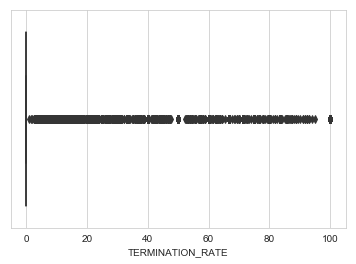

In [164]:
sns.boxplot("TERMINATION_RATE", data=train, palette="viridis")

In [165]:
len(train[train["TERMINATION_RATE"] == 0])

44093

In [519]:
importance_measure("TERMINATION_RATE", seed=111, max_test=25, algorithm=ExtraTreesRegressor(random_state=111))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


重要性排序: ['LIFE_CNT' 'L1YR_LAPSE_IND' 'BANK_NUMBER_CNT' 'CHANNEL_A_POL_CNT'
 'CLC_CUR_NUM' 'AG_CNT' 'CONTACT_CITY_CD' 'CHARGE_CITY_CD' 'LIFE_INSD_CNT'
 'IF_ADD_IND' 'AGE' 'AG_NOW_CNT' 'CUST_9_SEGMENTS_CD'
 'TOOL_VISIT_1YEAR_CNT' 'IF_ISSUE_N_IND' 'INSD_CNT'
 'IF_HOUSEHOLD_CLAIM_IND' 'LAST_C_DT' 'APC_CNT' 'IF_S_REAL_IND'
 'LAST_A_CCONTACT_DT' 'L1YR_GROSS_PRE_AMT' 'IM_CNT' 'IM_IS_D_IND'
 'IF_2ND_GEN_IND' 'LAST_B_CONTACT_DT' 'IF_ISSUE_P_IND' 'IF_Y_REAL_IND'
 'IM_IS_B_IND' 'CHANNEL_B_POL_CNT' 'IM_IS_C_IND' 'LAST_A_ISSUE_DT'
 'IF_ISSUE_Q_IND' 'L1YR_PAYMENT_REMINDER_IND' 'IF_ISSUE_J_IND'
 'IF_ADD_R_IND' 'IF_ADD_F_IND' 'IF_ISSUE_D_IND' 'IF_ADD_L_IND'
 'IF_ISSUE_C_IND' 'IF_ISSUE_I_IND' 'L1YR_A_ISSUE_CNT' 'IF_ADD_Q_IND'
 'IF_ISSUE_F_IND' 'IF_ISSUE_A_IND' 'IF_ISSUE_B_IND' 'IF_ISSUE_O_IND'
 'IF_ISSUE_G_IND' 'IM_IS_A_IND' 'IF_ISSUE_E_IND' 'IF_ISSUE_L_IND'
 'IF_ADD_G_IND' 'IF_ISSUE_M_IND' 'LAST_B_ISSUE_DT' 'IF_ISSUE_K_IND'
 'L1YR_B_ISSUE_CNT' 'IF_ISSUE_H_IND']
-----------------------------------
測試欄位數

### 做離散化 : 分成3類: 
1. 是0=>0 
2. 非0=>1 
3. NA=>2

In [166]:
def termination_impute_fun(col):
    
    if pd.isnull(col):
        return 2
    
    elif col == 0:
        return 0
    
    else:
        return 1

In [167]:
train["TERMINATION_RATE"] = train["TERMINATION_RATE"].apply(termination_impute_fun)

In [168]:
# 遺失值數量
len(train.columns[pd.isnull(train).sum() != 0])

48

In [169]:
train.to_csv("train_clean1.csv")

In [170]:
# check
# pd.read_csv("train_clean1.csv", index_col=0)

,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,IF_ISSUE_INSD_M_IND,IF_ISSUE_INSD_N_IND,IF_ISSUE_INSD_O_IND,IF_ISSUE_INSD_P_IND,IF_ISSUE_INSD_Q_IND,IF_ADD_INSD_IND,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,Y1,numbers_of_null
CUS_ID,,,,,,,,,,,,,,,,,,,,,
3418,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000174,3,0,33
4302,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.008724,1,0,33
5545,1.0,1,1,1,1.0,0.0,1,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.005359,1,0,9
7207,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,3,0,33
7213,1.0,1,1,1,1.0,0.0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.000603,3,0,13
8818,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000243,3,0,33
9681,1.0,1,1,1,0.0,0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.002600,1,0,33
9743,1.0,1,1,1,0.0,0.0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.002887,1,0,33
9839,1.0,1,1,1,1.0,0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000140,3,0,31
